In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Real-World Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
sampling = "nodes"                          # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.9                                # fraction of nodes to sample 
epoch = 1                                   # epoch (iteration number #)
LC = "prior"                                # local model
RC = "nBC"                                  # relational model
CI = "relaxation"                           # inference
IGNORE = None                               # IGNORE class value (valid for Facebook datasets)
DATASETS = {'caltech':'Caltech36',          # Facebook friendship network       
            'escort':'Escorts',             # Sexual contact network in Brazil
            'github':'GitHub',              # GitHub mutual-following developer network
            'swarth':'Swarthmore42',    # Facebook friendship network   
            'usf':'USF512009',              # Facebook friendship network   
            'wiki':'Wikipedia'}        # Wikipedia mutual-hyperlink network of american politicians
DATAFN = "../data/{}.gpickle"               # networkx graph file path
OUTPUT = "../results-individual"            # directory to store results

<h2>1. Network</h2>

In [4]:
dataset = 'wiki'
DATAFN = DATAFN.format(DATASETS[dataset])
IGNORE = 0 if dataset in ['caltech','swarthmore','usf'] else None

In [5]:
net = Network()
net.load(DATAFN, IGNORE)
net.info()

Name: Wikipedia
Type: Graph
Number of nodes: 2132
Number of edges: 3143
Average degree:   2.9484
{'km': 2.55045871559633, 'HMM': None, 'm': None, 'i': None, 'density': 0.0013835782511887856, 'kind': None, 'e': 3143, 'N': None, 'n': 2132, 'min_degree': 1, 'labels': ['male', 'female'], 'group': ['M', 'm'], 'h': 0.8, 'b': 0.15337711069418386, 'Hmm': None, 'H': None, 'kM': 3.020498614958449, 'fullname': 'Wikipedia', 'k': 2.948405253283302, 'B': None, 'name': 'Wikipedia', 'class': 'gender', 'attributes': ['gender'], 'x': None}


<h2>2. Sampling</h2>

In [6]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: Wikipedia
Type: Graph
Number of nodes: 1919
Number of edges: 2539
Average degree:   2.6462
{'km': 2.2783505154639174, 'HMM': None, 'm': 0, 'i': None, 'density': 0.0013796506153002657, 'kind': None, 'e': 2539, 'epoch': 1, 'N': 1919, 'labels': ['male', 'female'], 'group': ['M', 'm'], 'h': 0.8, 'pseeds': 0.9, 'method': 'nodes', 'Hmm': None, 'H': 4.211285749296953, 'kM': 2.711916461916462, 'fullname': 'Wikipedia', 'k': 2.6461698801459095, 'B': 0.15164147993746743, 'name': 'Wikipedia', 'class': 'gender', 'attributes': ['gender'], 'x': None}


<h2>3. Modeling</h2>

In [7]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

male      0.847996
female    0.152004
dtype: float64


In [8]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

            male    female
male    0.897668  0.102332
female  0.679699  0.320301


<h2>4. Inference</h2>

In [9]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0.07219721272708227, 0.05564196218011151, 0.24338153244564237, 0.07219721272708227, 0.09319209184278768)

Prediction in 85.80232286453247 seconds
ROCAUC: 0.6253138731952291
ROCAUC curve: 0.6253138731952291
MAE: 0.3145539906103286
ccm: 0.19444444444444445
ccM: 0.7853107344632768
bias: 0.19846227775108122

Wikipedia_nodes creating...
Wikipedia_nodes created!
Wikipedia_nodes/P90_graph.gpickle saved!
Wikipedia_nodes/P90_samplegraph.gpickle saved!
Wikipedia_nodes/P90_evaluation.pickle saved!


<h2>5. Results</h2>

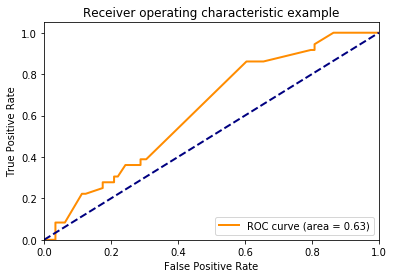

In [10]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)